In [545]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [546]:
n_c = 100000
rolls_per_player = 75
results_c = [0] * n_c
results_normalised_c =  [0] * n_c


In [547]:
for i in range(n_c):
    for j in range(rolls_per_player):
        results_c[i] += rand.randint(1, 6)

var_c = np.var(results_c)
std_dev_c = np.std(results_c)
mean_c = np.mean(results_c)
results_normalised_c = [(result - mean_c)/std_dev_c for result in results_c]    


print("variance of control ", var_c)
print("std_dev of control ", std_dev_c)
print("mean of control ", mean_c)
print(results_normalised_c[i])

variance of control  218.93591855839995
std_dev of control  14.796483317275086
mean of control  262.46804
-0.5047172250233906


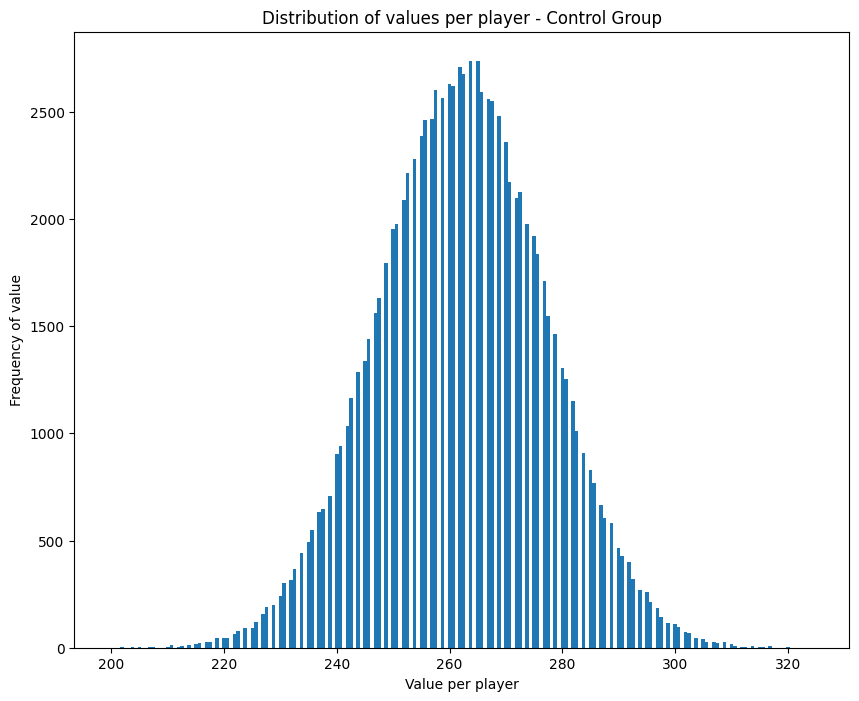

In [548]:
plt.figure(figsize=[10,8])
plt.xlabel('Value per player')
plt.ylabel('Frequency of value')
plt.title('Distribution of values per player - Control Group')
plt.hist(results_c, bins=200, align='left')
plt.show()

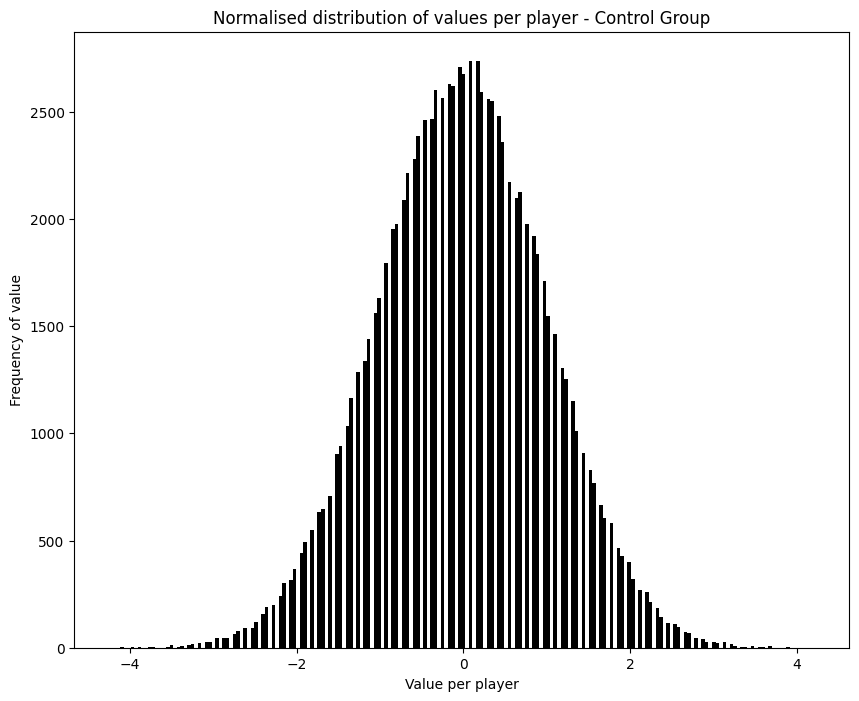

In [549]:
plt.figure(figsize=[10,8])
plt.xlabel('Value per player')
plt.ylabel('Frequency of value')
plt.title('Normalised distribution of values per player - Control Group')
plt.hist(results_normalised_c, bins=200, align='left', color='black')
plt.show()

In [550]:
# ok let's now try ot understand the sample itself 

sample_mean_c = mean_c
sample_error_c = std_dev_c/math.sqrt(n_c)
print("sample mean control ", sample_mean_c)
print("sample error control", sample_error_c)

interval_negative = sample_mean_c-(2.58*sample_error_c)
interval_positive = sample_mean_c+(2.58*sample_error_c)

print("I'm 99% sure that the real mean is between ", interval_negative, " and ", interval_positive)



sample mean control  262.46804
sample error control 0.046790588643273116
I'm 99% sure that the real mean is between  262.3473202813003  and  262.58875971869963


In [624]:
# now let's make a test variant 
n_t = 1000
results_t = [0] * n_t
results_normalised_t = [0] * n_t
desired_bias = 0.01

for i in range(n_t):
    for j in range(rolls_per_player):
        if(i%1000 < desired_bias*1000): 
            results_t[i] += rand.randint(1, 4)
        else:
            results_t[i] += rand.randint(1, 6)


var_t = np.var(results_t)
std_dev_t = np.std(results_t)
mean_t = np.mean(results_t)
results_normalised_t = [(result - mean_t)/std_dev_t for result in results_t]    


print("variance of test ", var_t)
print("std_dev of test ", std_dev_t)
print("mean of test ", mean_t)

variance of test  260.211871
std_dev of test  16.131083999533324
mean of test  260.877


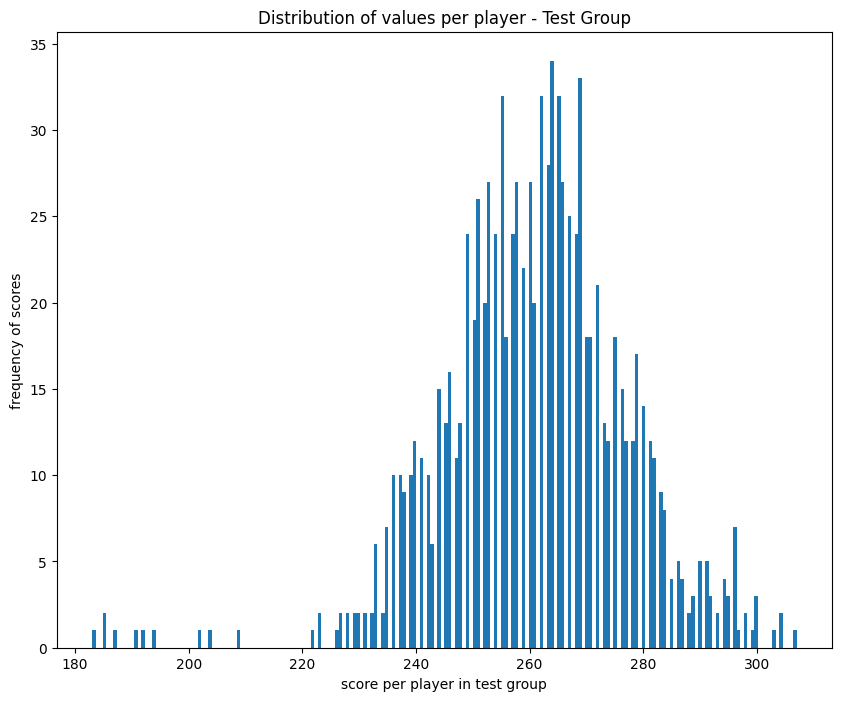

In [625]:
plt.figure(figsize=[10,8])
plt.xlabel("score per player in test group")
plt.ylabel("frequency of scores")
plt.title('Distribution of values per player - Test Group')
plt.hist(results_t, bins=200)
plt.show()

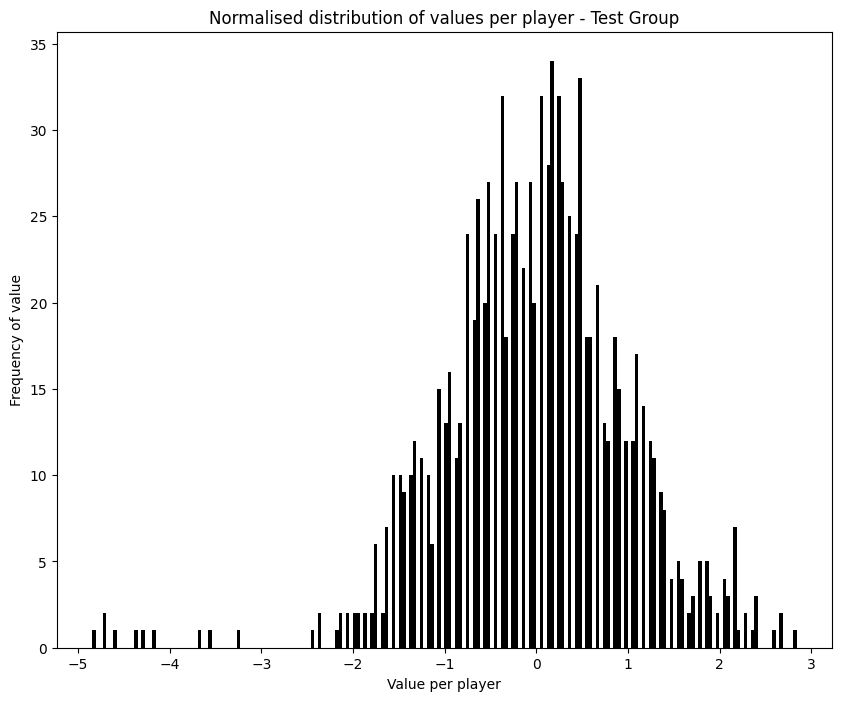

In [626]:
plt.figure(figsize=[10,8])
plt.xlabel('Value per player')
plt.ylabel('Frequency of value')
plt.title('Normalised distribution of values per player - Test Group')
plt.hist(results_normalised_t, bins=200, align='left', color='black')
plt.show()

In [627]:
# What can we understand from the test sample?

sample_mean_t = mean_t
sample_error_t = std_dev_t/math.sqrt(n_t)
print("sample mean control ", sample_mean_t)
print("sample error control", sample_error_t)

interval_negative_t = sample_mean_t-(2.58*sample_error)
interval_positive_t = sample_mean_t+(2.58*sample_error)

print("I'm 99% sure that the real mean of my test variant is between ", interval_negative_t, " and ", interval_positive_t)


sample mean control  260.877
sample error control 0.5101096656602382
I'm 99% sure that the real mean of my test variant is between  260.75615055092015  and  260.99784944907987


In [628]:
diff = (sample_mean_t - sample_mean_c)
print(diff)
print(sample_error_t)
z_score = diff/sample_error_t


-1.591039999999964
0.5101096656602382


In [629]:
import scipy
z_score
p_value = scipy.stats.norm.sf(abs(z_score))*2
p_value

0.0018145635971421432